In [3]:
import pandas as pd
import missingno as mno
import xgboost as xgb
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics,svm
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score,classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn import tree,preprocessing 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import *
from sklearn.preprocessing import *
import warnings
warnings.filterwarnings('ignore')

In [94]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
df_train

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,3/30/2019 21:55,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_293,4/29/2019 14:35,1.0,InvestorId_1,4/29/2019 21:55,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,3/30/2019 23:54,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1040,4/29/2019 14:32,1.0,InvestorId_1,4/29/2019 23:53,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,3/31/2019 5:40,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1585,6/15/2019 6:20,1.0,InvestorId_1,4/30/2019 5:40,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,3/31/2019 9:37,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1314,4/23/2019 15:44,1.0,InvestorId_1,4/30/2019 9:37,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [6]:
df_test

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_310,3/31/2019 13:33,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 13:33,LoanId_1027,InvestorId_1,LoanApplicationId_825,ThirdPartyId_1175
1,CustomerId_243,3/31/2019 15:04,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,3/31/2019 15:04,LoanId_768,InvestorId_1,LoanApplicationId_68,ThirdPartyId_604
2,CustomerId_142,3/31/2019 17:31,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 17:31,LoanId_1067,InvestorId_1,LoanApplicationId_1223,ThirdPartyId_1521
3,CustomerId_142,3/31/2019 17:32,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 17:32,LoanId_202,InvestorId_1,LoanApplicationId_633,ThirdPartyId_406
4,CustomerId_142,3/31/2019 17:34,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 17:34,LoanId_533,InvestorId_1,LoanApplicationId_309,ThirdPartyId_302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,CustomerId_412,7/16/2019 0:18,500.0,-500.0,TransactionId_680,BatchId_2079,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_1,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
901,CustomerId_326,7/16/2019 3:17,1000.0,-1000.0,TransactionId_2504,BatchId_1432,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
902,CustomerId_497,7/16/2019 15:06,1000.0,-1000.0,TransactionId_995,BatchId_1410,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
903,CustomerId_497,7/16/2019 15:09,800.0,-800.0,TransactionId_708,BatchId_1343,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN


In [7]:
df_train.isnull().sum()

CustomerId                 0
TransactionStartTime       0
Value                      0
Amount                     0
TransactionId              0
BatchId                    0
SubscriptionId             0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
TransactionStatus          0
IssuedDateLoan           612
AmountLoan               612
Currency                 612
LoanId                   612
PaidOnDate               612
IsFinalPayBack           612
InvestorId               612
DueDate                  614
LoanApplicationId        617
PayBackId                612
ThirdPartyId             614
IsThirdPartyConfirmed    612
IsDefaulted              612
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             2100 non-null   object 
 1   TransactionStartTime   2100 non-null   object 
 2   Value                  2100 non-null   float64
 3   Amount                 2100 non-null   float64
 4   TransactionId          2100 non-null   object 
 5   BatchId                2100 non-null   object 
 6   SubscriptionId         2100 non-null   object 
 7   CurrencyCode           2100 non-null   object 
 8   CountryCode            2100 non-null   int64  
 9   ProviderId             2100 non-null   object 
 10  ProductId              2100 non-null   object 
 11  ProductCategory        2100 non-null   object 
 12  ChannelId              2100 non-null   object 
 13  TransactionStatus      2100 non-null   int64  
 14  IssuedDateLoan         1488 non-null   object 
 15  Amou

In [9]:
df_test.isnull().sum()

CustomerId                0
TransactionStartTime      0
Value                     0
Amount                    0
TransactionId             0
BatchId                   0
SubscriptionId            0
CurrencyCode              0
CountryCode               0
ProviderId                0
ProductId                 0
ProductCategory           0
ChannelId                 0
TransactionStatus         0
IssuedDateLoan          427
LoanId                  427
InvestorId              427
LoanApplicationId       427
ThirdPartyId            427
dtype: int64

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            905 non-null    object 
 1   TransactionStartTime  905 non-null    object 
 2   Value                 905 non-null    float64
 3   Amount                905 non-null    float64
 4   TransactionId         905 non-null    object 
 5   BatchId               905 non-null    object 
 6   SubscriptionId        905 non-null    object 
 7   CurrencyCode          905 non-null    object 
 8   CountryCode           905 non-null    int64  
 9   ProviderId            905 non-null    object 
 10  ProductId             905 non-null    object 
 11  ProductCategory       905 non-null    object 
 12  ChannelId             905 non-null    object 
 13  TransactionStatus     905 non-null    int64  
 14  IssuedDateLoan        478 non-null    object 
 15  LoanId                4

In [11]:
list(set(df_train.columns) - set(df_test.columns))

['IsThirdPartyConfirmed',
 'PayBackId',
 'Currency',
 'AmountLoan',
 'IsFinalPayBack',
 'IsDefaulted',
 'DueDate',
 'PaidOnDate']

In [12]:
df_sameid = df_train[df_train["CustomerId" ]== 'CustomerId_27']

In [13]:
df_sameid = df_train[df_train["CustomerId" ].isin(df_test['CustomerId'])]

In [14]:
df_sameid

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,3/30/2019 21:55,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_293,4/29/2019 14:35,1.0,InvestorId_1,4/29/2019 21:55,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,3/30/2019 23:54,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1040,4/29/2019 14:32,1.0,InvestorId_1,4/29/2019 23:53,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,3/31/2019 5:40,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1585,6/15/2019 6:20,1.0,InvestorId_1,4/30/2019 5:40,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,3/31/2019 9:37,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1314,4/23/2019 15:44,1.0,InvestorId_1,4/30/2019 9:37,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [15]:
df_cos27 = df_train[df_train["CustomerId" ]== 'CustomerId_27']

In [16]:
df_cos27

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CustomerId_27,9/28/2018 12:40,500.0,-500.0,TransactionId_930,BatchId_357,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CustomerId_27,10/3/2018 9:34,500.0,-500.0,TransactionId_1381,BatchId_8,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CustomerId_27,10/17/2018 9:06,1235.0,-1235.0,TransactionId_255,BatchId_1082,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CustomerId_27,10/17/2018 12:02,1235.0,-1235.0,TransactionId_543,BatchId_1195,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,CustomerId_27,10/19/2018 9:51,1030.0,-1030.0,TransactionId_379,BatchId_2253,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_train

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,3/30/2019 21:55,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_293,4/29/2019 14:35,1.0,InvestorId_1,4/29/2019 21:55,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,3/30/2019 23:54,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1040,4/29/2019 14:32,1.0,InvestorId_1,4/29/2019 23:53,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,3/31/2019 5:40,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1585,6/15/2019 6:20,1.0,InvestorId_1,4/30/2019 5:40,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,3/31/2019 9:37,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1314,4/23/2019 15:44,1.0,InvestorId_1,4/30/2019 9:37,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [18]:
c = df_train.columns
c[0]
z = range(0,len(c)-1)

for x,z in zip(c,z):
    print(c[z],len(df_train[x].unique()))

CustomerId 421
TransactionStartTime 1606
Value 98
Amount 77
TransactionId 1758
BatchId 1713
SubscriptionId 6
CurrencyCode 1
CountryCode 1
ProviderId 1
ProductId 16
ProductCategory 7
ChannelId 1
TransactionStatus 2
IssuedDateLoan 1102
AmountLoan 648
Currency 2
LoanId 1160
PaidOnDate 1428
IsFinalPayBack 3
InvestorId 4
DueDate 1102
LoanApplicationId 1157
PayBackId 1486
ThirdPartyId 1482
IsThirdPartyConfirmed 3


In [19]:
df_train["Currency"].value_counts()

UGX    1488
Name: Currency, dtype: int64

In [20]:
df_train["Currency"].isnull().value_counts()

False    1488
True      612
Name: Currency, dtype: int64

In [21]:
df_train.drop(["CurrencyCode", "CountryCode", "ProviderId", "ChannelId", "TransactionStatus", "Currency"], axis=1, inplace=True)
df_train.drop(["TransactionId", "SubscriptionId", "ThirdPartyId", "InvestorId", "PayBackId"], axis=1, inplace=True)

In [22]:
df_train.drop(["BatchId","LoanId"],axis=1,inplace=True)


In [23]:
df_train.drop(["LoanApplicationId"],axis=1,inplace=True)

In [24]:
df_train

,CustomerId,TransactionStartTime,Value,Amount,ProductId,ProductCategory,IssuedDateLoan,AmountLoan,PaidOnDate,IsFinalPayBack,DueDate,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,-550.0,ProductId_7,airtime,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,-550.0,ProductId_7,airtime,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,-550.0,ProductId_7,airtime,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,-1000.0,ProductId_7,airtime,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,-500.0,ProductId_7,airtime,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,3/30/2019 21:55,2000.0,-2000.0,ProductId_8,data_bundles,3/30/2019 21:55,2370.0,4/29/2019 14:35,1.0,4/29/2019 21:55,1.0,0.0
2096,CustomerId_28,3/30/2019 23:54,5000.0,-5000.0,ProductId_7,airtime,3/30/2019 23:54,5925.0,4/29/2019 14:32,1.0,4/29/2019 23:53,1.0,0.0
2097,CustomerId_34,3/31/2019 5:40,5000.0,-5000.0,ProductId_3,airtime,3/31/2019 5:40,7100.0,6/15/2019 6:20,1.0,4/30/2019 5:40,1.0,0.0
2098,CustomerId_346,3/31/2019 9:37,1500.0,-1500.0,ProductId_8,data_bundles,3/31/2019 9:37,1733.0,4/23/2019 15:44,1.0,4/30/2019 9:37,1.0,0.0


In [25]:
c = df_train.columns
c[0]
z = range(0,len(c)-1)

for x,z in zip(c,z):
    print(c[z],len(df_train[x].unique()))

CustomerId 421
TransactionStartTime 1606
Value 98
Amount 77
ProductId 16
ProductCategory 7
IssuedDateLoan 1102
AmountLoan 648
PaidOnDate 1428
IsFinalPayBack 3
DueDate 1102
IsThirdPartyConfirmed 3


In [26]:
df_train["IsFinalPayBack"].value_counts()

1.0    1089
0.0     399
Name: IsFinalPayBack, dtype: int64

In [27]:
df_train["IsDefaulted"].value_counts()

0.0    1310
1.0     178
Name: IsDefaulted, dtype: int64

On va transformer le dataset pour qu'il soit exploitable on utilisera les variables petit à petit

In [28]:
#df_train = df_train.dropna()

In [95]:
df = df_train.copy()

In [96]:
df

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,3/30/2019 21:55,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_293,4/29/2019 14:35,1.0,InvestorId_1,4/29/2019 21:55,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,3/30/2019 23:54,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1040,4/29/2019 14:32,1.0,InvestorId_1,4/29/2019 23:53,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,3/31/2019 5:40,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1585,6/15/2019 6:20,1.0,InvestorId_1,4/30/2019 5:40,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,3/31/2019 9:37,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1314,4/23/2019 15:44,1.0,InvestorId_1,4/30/2019 9:37,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [97]:
df.drop(["TransactionStartTime", "IssuedDateLoan", "PaidOnDate", "DueDate"], axis=1, inplace=True)

In [98]:
df

,CustomerId,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,...,AmountLoan,Currency,LoanId,IsFinalPayBack,InvestorId,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,...,2370.0,UGX,LoanId_293,1.0,InvestorId_1,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,...,5925.0,UGX,LoanId_1040,1.0,InvestorId_1,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,...,7100.0,UGX,LoanId_1585,1.0,InvestorId_1,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,...,1733.0,UGX,LoanId_1314,1.0,InvestorId_1,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [99]:
emprunt = df.CustomerId.value_counts()


In [100]:
df_valuecount = emprunt.reset_index()

In [101]:
df_valuecount[df_valuecount["index"] == 'CustomerId_258']

,index,CustomerId
26,CustomerId_258,17


In [103]:
df_valuecount

,index,CustomerId
0,CustomerId_390,100
1,CustomerId_369,53
2,CustomerId_233,42
3,CustomerId_399,40
4,CustomerId_326,30
...,...,...
416,CustomerId_147,1
417,CustomerId_378,1
418,CustomerId_40,1
419,CustomerId_49,1


In [104]:
df2 = pd.merge(df, df_valuecount, left_on = ['CustomerId'], right_on = ['index'])

In [105]:
df

,CustomerId,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,...,AmountLoan,Currency,LoanId,IsFinalPayBack,InvestorId,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,...,2370.0,UGX,LoanId_293,1.0,InvestorId_1,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,...,5925.0,UGX,LoanId_1040,1.0,InvestorId_1,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,...,7100.0,UGX,LoanId_1585,1.0,InvestorId_1,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,...,1733.0,UGX,LoanId_1314,1.0,InvestorId_1,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [106]:
df2.drop("index",axis=1)

,CustomerId_x,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,...,Currency,LoanId,IsFinalPayBack,InvestorId,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted,CustomerId_y
0,CustomerId_27,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
1,CustomerId_27,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
2,CustomerId_27,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
3,CustomerId_27,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
4,CustomerId_27,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_205,500.0,-500.0,TransactionId_1896,BatchId_2071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_4,...,UGX,LoanId_1148,1.0,InvestorId_1,LoanApplicationId_924,PayBackId_1966,ThirdPartyId_1094,1.0,0.0,5
2096,CustomerId_205,500.0,-500.0,TransactionId_2547,BatchId_779,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2097,CustomerId_212,3500.0,-3500.0,TransactionId_1902,BatchId_2145,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_13,...,UGX,LoanId_1503,1.0,InvestorId_1,LoanApplicationId_907,PayBackId_1658,ThirdPartyId_831,1.0,0.0,2
2098,CustomerId_212,1000.0,-1000.0,TransactionId_1572,BatchId_2378,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [134]:
#df2.drop(["TransactionId", "SubscriptionId", "ThirdPartyId", "InvestorId", "PayBackId"], axis=1, inplace=True)
#df2.drop(["CurrencyCode", "CountryCode", "ProviderId", "ChannelId", "TransactionStatus", "Currency"], axis=1, inplace=True)

In [135]:
#df2 = df2.drop(["BatchId", "CustomerId_x"], axis=1)

In [128]:
df2 = df2.drop("index", axis=1)


In [131]:
df2 = df2.drop("LoanApplicationId", axis=1)


In [139]:
df2 = df2.drop("LoanId", axis=1)

In [140]:
df3 = df2.dropna()

In [141]:
df3

,Value,Amount,ProductId,ProductCategory,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,CustomerId_y
11,1000.0,-1000.0,ProductId_7,airtime,1085.0,1.0,0.0,0.0,26
12,500.0,-500.0,ProductId_7,airtime,543.0,1.0,0.0,0.0,26
13,500.0,-500.0,ProductId_4,data_bundles,543.0,1.0,0.0,0.0,26
15,500.0,-500.0,ProductId_4,data_bundles,520.0,1.0,1.0,0.0,26
16,1500.0,-1500.0,ProductId_7,airtime,1575.0,1.0,1.0,0.0,26
...,...,...,...,...,...,...,...,...,...
2090,5000.0,-5000.0,ProductId_7,airtime,5200.0,1.0,1.0,0.0,1
2091,2500.0,-2500.0,ProductId_7,airtime,2850.0,1.0,1.0,0.0,1
2095,500.0,-500.0,ProductId_4,data_bundles,520.0,1.0,1.0,0.0,5
2097,3500.0,-3500.0,ProductId_13,tv,3763.0,1.0,1.0,0.0,2


In [142]:
df_demise = pd.get_dummies(df3)

In [143]:
df_demise.columns

Index(['Value', 'Amount', 'AmountLoan', 'IsFinalPayBack',
       'IsThirdPartyConfirmed', 'IsDefaulted', 'CustomerId_y',
       'ProductId_ProductId_1', 'ProductId_ProductId_10',
       'ProductId_ProductId_13', 'ProductId_ProductId_15',
       'ProductId_ProductId_16', 'ProductId_ProductId_17',
       'ProductId_ProductId_18', 'ProductId_ProductId_2',
       'ProductId_ProductId_3', 'ProductId_ProductId_4',
       'ProductId_ProductId_5', 'ProductId_ProductId_6',
       'ProductId_ProductId_7', 'ProductId_ProductId_8',
       'ProductId_ProductId_9', 'ProductCategory_airtime',
       'ProductCategory_data_bundles', 'ProductCategory_financial_services',
       'ProductCategory_movies', 'ProductCategory_retail',
       'ProductCategory_tv', 'ProductCategory_utility_bill'],
      dtype='object')

In [144]:
df_demise

,Value,Amount,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,CustomerId_y,ProductId_ProductId_1,ProductId_ProductId_10,ProductId_ProductId_13,...,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill
11,1000.0,-1000.0,1085.0,1.0,0.0,0.0,26,0,0,0,...,1,0,0,1,0,0,0,0,0,0
12,500.0,-500.0,543.0,1.0,0.0,0.0,26,0,0,0,...,1,0,0,1,0,0,0,0,0,0
13,500.0,-500.0,543.0,1.0,0.0,0.0,26,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15,500.0,-500.0,520.0,1.0,1.0,0.0,26,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16,1500.0,-1500.0,1575.0,1.0,1.0,0.0,26,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,5000.0,-5000.0,5200.0,1.0,1.0,0.0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2091,2500.0,-2500.0,2850.0,1.0,1.0,0.0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2095,500.0,-500.0,520.0,1.0,1.0,0.0,5,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2097,3500.0,-3500.0,3763.0,1.0,1.0,0.0,2,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [145]:
X = df_demise.drop("IsDefaulted", axis=1)
y = df_demise["IsDefaulted"]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [147]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dtr=dtree.fit(X_train, y_train)
dtrpred = dtree.predict(X_test)
print(classification_report(y_test,dtrpred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       261
         1.0       0.85      0.92      0.88        37

    accuracy                           0.97       298
   macro avg       0.92      0.95      0.93       298
weighted avg       0.97      0.97      0.97       298



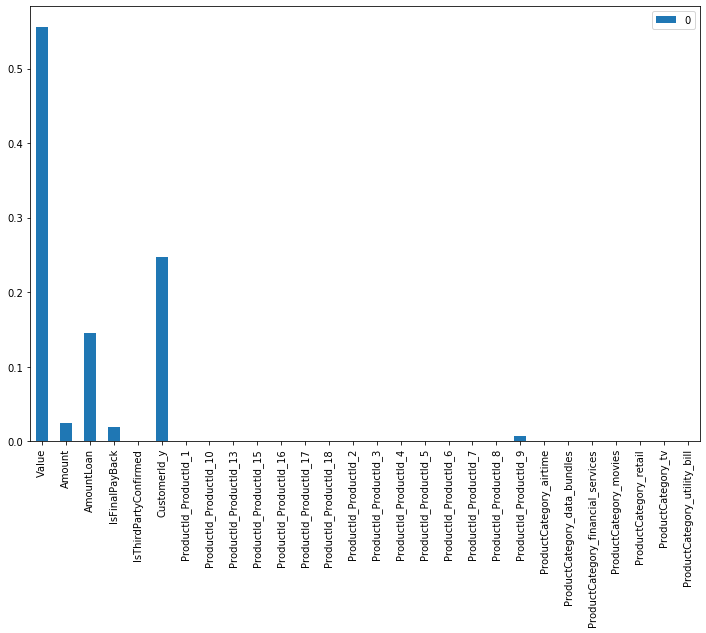

In [148]:
pd.DataFrame(dtree.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

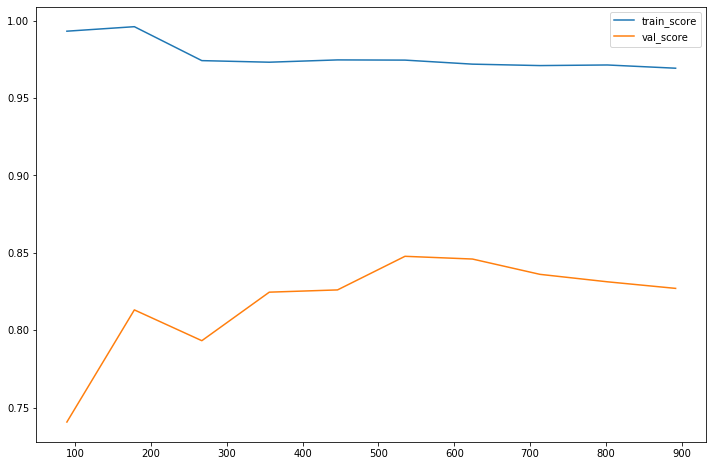

In [149]:
N, train_score,val_score = learning_curve(dtree, X_train, y_train, cv = 4, train_sizes = np.linspace(0.1,1,10), scoring = 'f1')
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1),label='train_score')
plt.plot(N, val_score.mean(axis=1),label='val_score')
plt.legend()

In [ ]:
random_forest_classifier = make_pipeline(SelectKBest(f_classif,k=10),RandomForestClassifier())
random_forest_classifier.fit(X_train,y_train)
y_pred_rfc = random_forest_classifier.predict(X_test)
print(classification_report(y_test,y_pred_rfc))

In [150]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
y_pred_rfc = random_forest_classifier.predict(X_test)
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       261
         1.0       0.91      0.86      0.89        37

    accuracy                           0.97       298
   macro avg       0.95      0.93      0.94       298
weighted avg       0.97      0.97      0.97       298



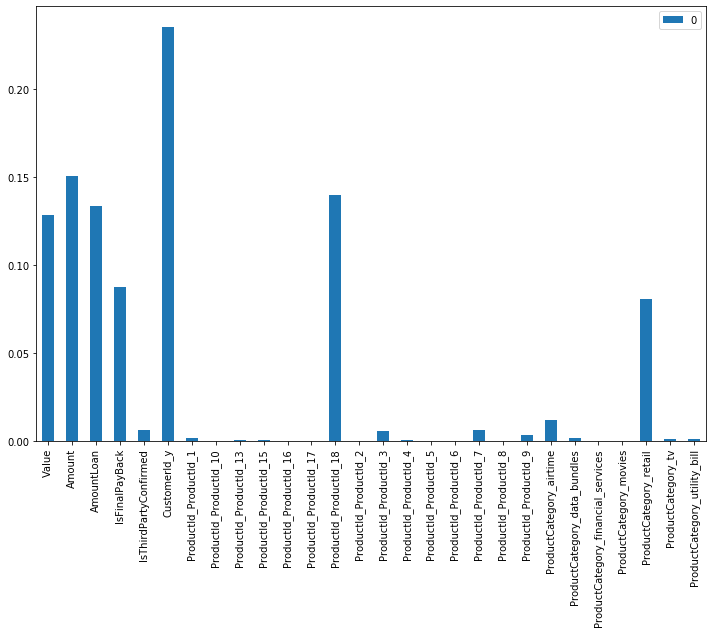

In [151]:
pd.DataFrame(random_forest_classifier.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

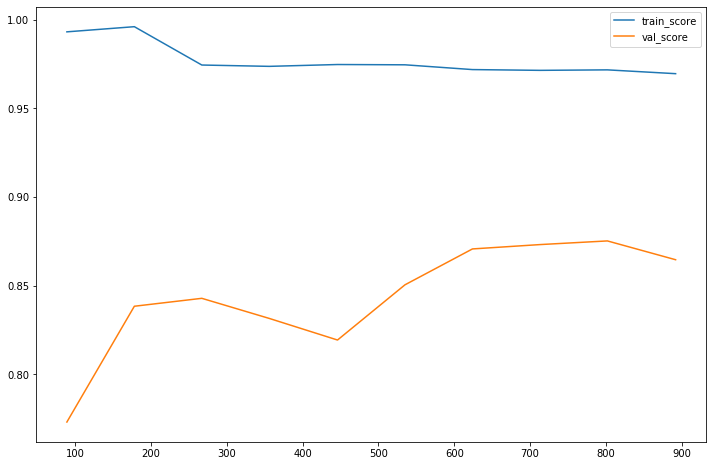

In [152]:
N, train_score,val_score = learning_curve(random_forest_classifier, X_train, y_train, cv = 4, train_sizes = np.linspace(0.1,1,10), scoring = 'f1')
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1),label='train_score')
plt.plot(N, val_score.mean(axis=1),label='val_score')
plt.legend()